Import libraries to be used.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Read the downloaded  data from a csv file and check out the first 5 observations using .head() function.

In [5]:
df=pd.read_csv("IT Salary Survey EU 2018.csv")
df
df.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


find out th total number of rows and columns in the dataset using .shape function. the function returns the total number of rows and columns in the dataset.

In [7]:
df.shape

(765, 14)

check out the columns and their corresponding datatypes also find out whether there are any null values or not.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           765 non-null    object 
 1   Age                                 672 non-null    float64
 2   Gender                              751 non-null    object 
 3   City                                736 non-null    object 
 4   Position                            737 non-null    object 
 5   Years of experience                 732 non-null    float64
 6   Your level                          743 non-null    object 
 7   Current Salary                      750 non-null    float64
 8   Salary one year ago                 596 non-null    float64
 9   Salary two years ago                463 non-null    float64
 10  Are you getting any Stock Options?  742 non-null    object 
 11  Main language at work               750 non-n

the data has object and float values and some columns have null values.
next use .describe() function to get summary statistcis. This function returns count, mean, standard deviation, min&max values and quartiles of the data.

In [10]:
df.describe()

,Age,Years of experience,Current Salary,Salary one year ago,Salary two years ago
count,672.000000,732.000000,750.000000,596.000000,463.000000
mean,32.183036,8.548497,68381.765333,62187.278523,58013.475162
std,5.107268,4.729557,21196.306557,20163.008663,20413.048908
min,21.000000,0.000000,10300.000000,10001.000000,10001.000000
25%,29.000000,5.000000,57000.000000,52000.000000,48000.000000
50%,32.000000,8.000000,65000.000000,60000.000000,56000.000000
75%,35.000000,11.000000,75000.000000,70000.000000,67000.000000
max,60.000000,38.000000,200000.000000,200000.000000,150000.000000


In [15]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


check to see if there is any correlations in the dataset

In [16]:
df.corr()

,Age,Years of experience,Current Salary,Salary one year ago,Salary two years ago
Age,1.000000,0.669573,0.250284,0.295843,0.314234
Years of experience,0.669573,1.000000,0.411662,0.423607,0.437610
Current Salary,0.250284,0.411662,1.000000,0.882679,0.823719
Salary one year ago,0.295843,0.423607,0.882679,1.000000,0.934377
Salary two years ago,0.314234,0.437610,0.823719,0.934377,1.000000


In [20]:
corr_matrix = df.corr()
corr_matrix

,Age,Years of experience,Current Salary,Salary one year ago,Salary two years ago
Age,1.000000,0.669573,0.250284,0.295843,0.314234
Years of experience,0.669573,1.000000,0.411662,0.423607,0.437610
Current Salary,0.250284,0.411662,1.000000,0.882679,0.823719
Salary one year ago,0.295843,0.423607,0.882679,1.000000,0.934377
Salary two years ago,0.314234,0.437610,0.823719,0.934377,1.000000


creating a heatmap using seaborn
set annot=true to show correlation values
use cmap to set color map for the heatmap

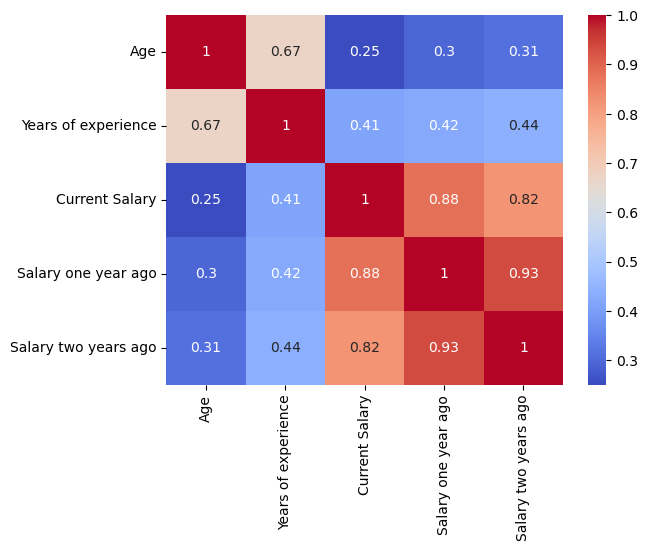

In [25]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


from above:
    .salary one year ago has a strong correlation with salary two years ago
    .current salary has a stronger correlation with salary one year ago than salary two years ago
    .current,first year and second year salary  has a very minimal correlation with age
    . years of experience has more correlation with age than with current and past salaries
    

make a box plot of age vs current salary

<AxesSubplot:xlabel='Age', ylabel='Current Salary'>

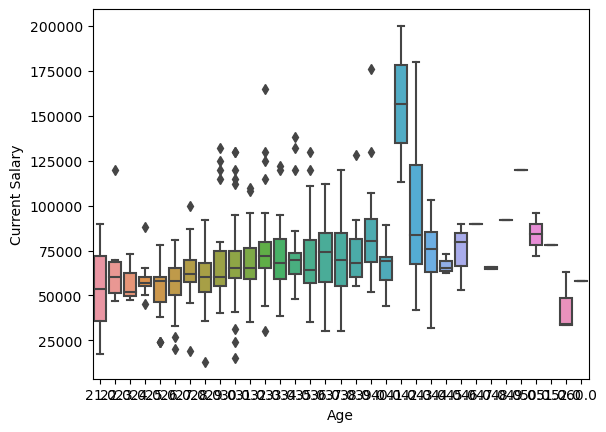

In [32]:
sns.boxplot(x="Age", y="Current Salary",data=df)

let's find out gender composition of the employees

In [39]:
Gender_count = df['Gender'].value_counts()
Gender_count

M    646
F    105
Name: Gender, dtype: int64

Now average salary of each gender

In [41]:
Gender_Avg_Salary = df.groupby('Gender')['Current Salary'].mean()
Gender_Avg_Salary

Gender
F    57272.903846
M    70144.544323
Name: Current Salary, dtype: float64